In [1]:
# Import our dependencies                                                                                          # 19.2.2
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

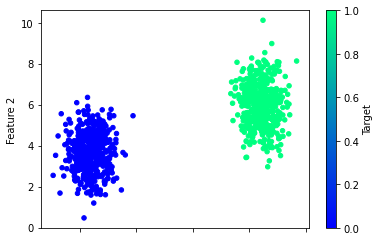

In [2]:
# Generate dummy dataset
X,y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])
df['Target'] = y

# Plotting the dummy data
df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# Use sklearn to plit dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [5]:
# Create the Keras Sequential mode
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data                                                                               # 19.2.3
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 4s 971us/step - loss: 0.6177 - accuracy: 0.7347
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6092 - accuracy: 0.7520
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.7613
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5913 - accuracy: 0.7733
Epoch 5/100
24/24 [==============================] - 0s 956us/step - loss: 0.5820 - accuracy: 0.7867
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7960
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5626 - accuracy: 0.8053
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.8147
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.8200
Epoch 10/100
24/24 [==============================] - 0s 978us/step - loss: 0.5323 - accuracy: 0.8253
Epo

24/24 [==============================] - 0s 2ms/step - loss: 0.1128 - accuracy: 0.9960
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1106 - accuracy: 0.9960
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1085 - accuracy: 0.9960
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9960
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1043 - accuracy: 0.9960
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1023 - accuracy: 0.9960
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1004 - accuracy: 0.9960
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0985 - accuracy: 0.9960
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0967 - accuracy: 0.9960
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0949 - accuracy: 0.9960
Epoch 92/100


<AxesSubplot:>

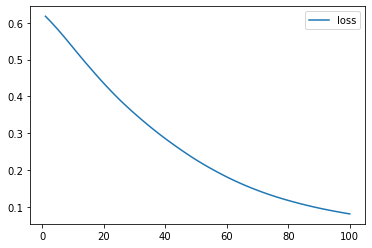

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

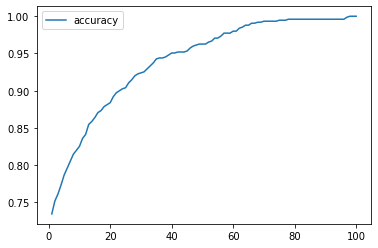

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 5s - loss: 0.0807 - accuracy: 1.0000 - 5s/epoch - 591ms/step
Loss: 0.08074595779180527, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

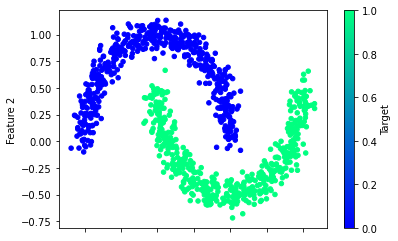

In [16]:
from sklearn.datasets import make_moons                                                                            # 19.2.4

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.2994 - accuracy: 0.3907
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1312 - accuracy: 0.4253
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 1.0235 - accuracy: 0.4507
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9493 - accuracy: 0.4707
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8950 - accuracy: 0.4867
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8511 - accuracy: 0.4960
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8148 - accuracy: 0.5173
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7821 - accuracy: 0.5280
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7548 - accuracy: 0.5467
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.5680
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.8813
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2777 - accuracy: 0.8840
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2770 - accuracy: 0.8840
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2762 - accuracy: 0.8840
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8840
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8853
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2742 - accuracy: 0.8853
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8853
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2730 - accuracy: 0.8853
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2724 - accuracy: 0.8853
Epoch 93/100


<AxesSubplot:>

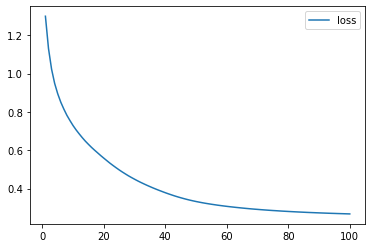

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

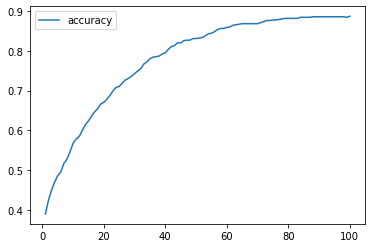

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model                                                                                # 19.2.5
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6335 - accuracy: 0.7307
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6042 - accuracy: 0.7947
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5821 - accuracy: 0.8080
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5647 - accuracy: 0.8200
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.8320
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 0.8373
Epoch 7/100
24/24 [==============================] - 0s 995us/step - loss: 0.5234 - accuracy: 0.8467
Epoch 8/100
24/24 [==============================] - 0s 978us/step - loss: 0.5094 - accuracy: 0.8533
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.8587
Epoch 10/100
24/24 [==============================] - 0s 946us/step - loss: 0.4774 - accuracy: 0.8627
Epo

24/24 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9107
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2226 - accuracy: 0.9107
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2220 - accuracy: 0.9107
Epoch 85/100
24/24 [==============================] - 0s 3ms/step - loss: 0.2214 - accuracy: 0.9107
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2209 - accuracy: 0.9107
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.9107
Epoch 88/100
24/24 [==============================] - 0s 895us/step - loss: 0.2197 - accuracy: 0.9093
Epoch 89/100
24/24 [==============================] - 0s 834us/step - loss: 0.2194 - accuracy: 0.9107
Epoch 90/100
24/24 [==============================] - 0s 904us/step - loss: 0.2186 - accuracy: 0.9107
Epoch 91/100
24/24 [==============================] - 0s 863us/step - loss: 0.2181 - accuracy: 0.9093
Epoch